In [53]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(0)

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Data

**Attribute**                    Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class: (2 for benign, 4 for malignant)
  
  ## Read Data

In [2]:
# UCI URL to breast cancer data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
cols = ["id_number", "Clump Thickness", 
        "Uniformity of Cell Size", "Uniformity of Cell Shape", 
        "Marginal Adhesion", "Single Epithelial Cell Size", 
        "Bare Nuclei", "Bland Chromatin", 
        "Normal Nucleoli", "Mitoses", "Class"]

data = pd.read_csv(url, header=None, na_values=['?'])
data.columns = cols

# the only missing data is found in the Bare Nuclei (designated by a ?)
# there are 16 such records...for now lets drop them
data = data.dropna(axis=0, how="any")
data.Class = data.Class.map({2:0, 4:1})

# below we assign a weight to the class percent in the entire dataset
#data["weight"] = data.Class.map({0:0.650073, 1:0.349927})
# the actual probability of developing breast cancer is around 12%
#data["weight2"] = data.Class.map({0:0.88, 1:0.12})
data.drop('id_number', axis=1, inplace=True)

# remove Class outcome from data and place in separate data frame
#y = data.Class.to_frame()
#data.drop('Class', axis=1, inplace=True)

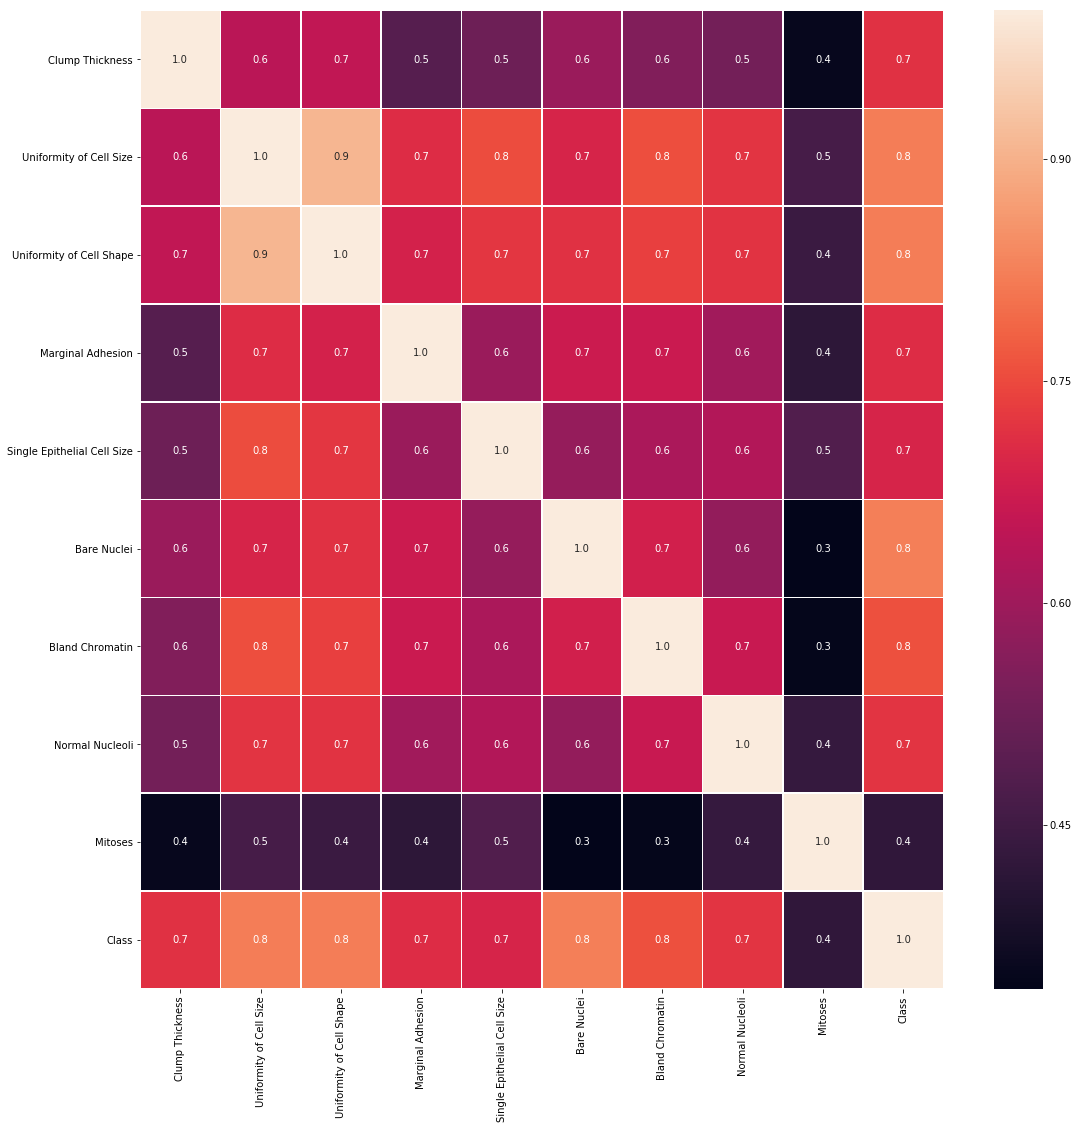

In [3]:
# Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## PCA

In [77]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# scale data
x_scaled = preprocessing.scale(x_train.values)

# Call PCA method
# let's call n_components = 2
pca = PCA(n_components=9)
pca_ = pca.fit_transform(x_scaled)
pca_components = pd.DataFrame(pca_)
pca_components.columns = x_train.columns

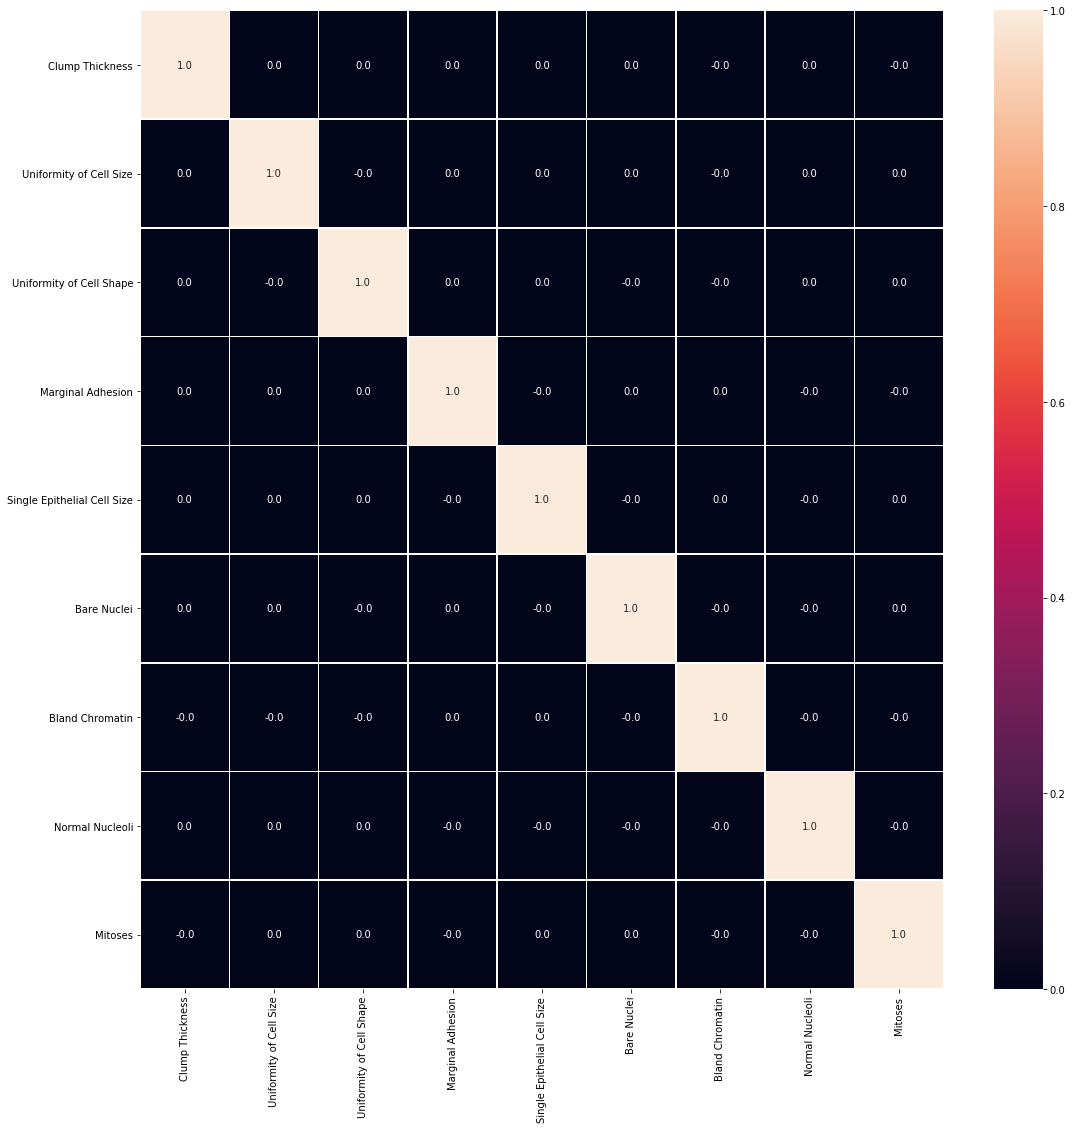

In [78]:
# Correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pca_components.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [82]:
# need to attach y
pca_components["Class"] = data["Class"]
pca_train, pca_test = train_test_split(pca_components, test_size = 0.3)
x_pca_train=pca_train.drop('Class',axis=1)
x_pca_test=pca_test.drop('Class',axis=1)
y_pca_train=pca_train['Class']
y_pca_test=pca_test['Class']

## Split

In [3]:
df_train, df_test = train_test_split(data, test_size = 0.3)
x_train=df_train.drop('Class',axis=1)
x_test=df_test.drop('Class',axis=1)
y_train=df_train['Class']
y_test=df_test['Class']

# Models

## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Create the model
model_lr = LogisticRegression()
model_lr.fit(X=x_train,y=y_train)

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       140
           1       0.97      0.89      0.93        65

   micro avg       0.96      0.96      0.96       205
   macro avg       0.96      0.94      0.95       205
weighted avg       0.96      0.96      0.96       205



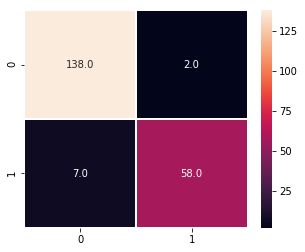

In [9]:
#Prediction
predicion_lr = model_lr.predict(x_test)
#Results:

#Clasification report
results_lr=metrics.classification_report(y_true=y_test, y_pred=predicion_lr)
print(results_lr)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_lr)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [5]:
cv_lr = cross_val_score(model_lr, x_test, y_test, cv=10)
print(cv_lr)
print("Average CV: {:.4f}".format(cv_lr.mean()))
print("CV variance: {:.4f}".format(cv_lr.var()))

[1.         0.95238095 0.95238095 0.95238095 0.85714286 0.95
 0.9        0.9        1.         0.95      ]
Average CV: 0.9414
CV variance: 0.0018


/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mitchellmurphy/anaconda3/envs/python3.5/l

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [109]:
# Create the model
model_dt = DecisionTreeClassifier(criterion="gini", max_features=8, max_depth=4)
# Fit the model
model_dt.fit(X=x_train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       130
           1       0.93      0.88      0.90        75

   micro avg       0.93      0.93      0.93       205
   macro avg       0.93      0.92      0.93       205
weighted avg       0.93      0.93      0.93       205



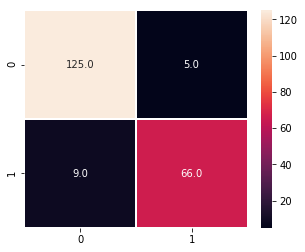

In [110]:
# Prediction
predicion_dt = model_dt.predict(x_test)

#Results:

#Clasification report
results_dt = metrics.classification_report(y_true=y_test, y_pred=predicion_dt)
print(results_dt)

#Confusion Matrix
cm_dt = metrics.confusion_matrix(y_true=y_test, y_pred=predicion_dt)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [116]:
cv_dt = cross_val_score(model_dt, x_test, y_test, cv=10)
print(cv_dt)
print("Average CV: {:.4f}".format(cv_dt.mean()))

[0.95238095 1.         0.95238095 1.         0.80952381 1.
 0.95       0.95       0.95       1.        ]
Average CV: 0.9564


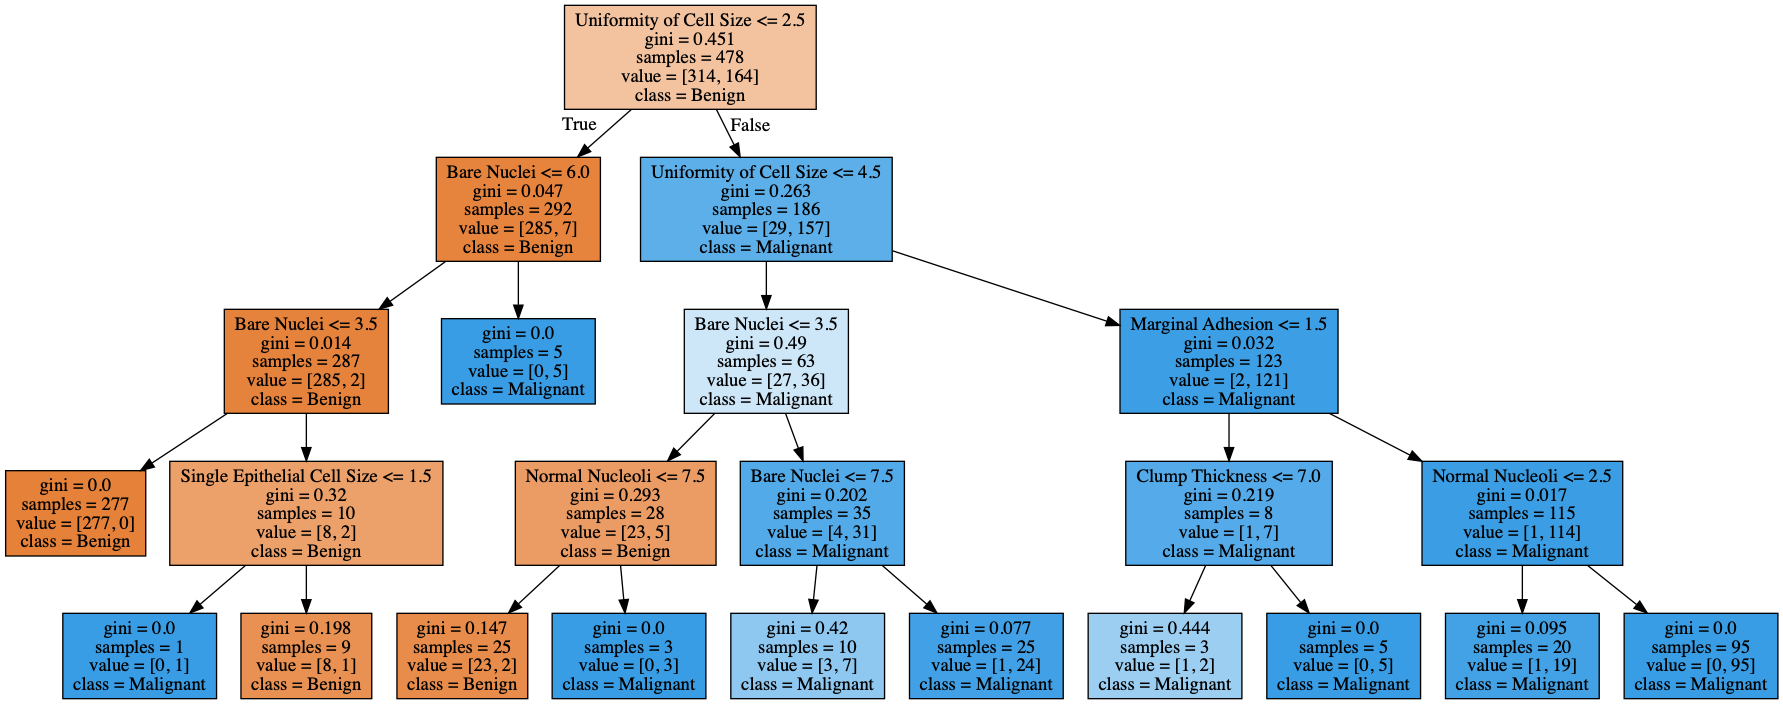

In [117]:
# Render our tree.
dot_data_dt = tree.export_graphviz(
    model_dt, out_file=None,
    feature_names=x_train.columns,
    class_names=['Benign', 'Malignant'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data_dt)
Image(graph.create_png())

This model places the majority of importance on the Uniformity of Cell Shape feature (77%), followed by Bare Nuclei (~11%).

*Now that we have eliminated the collinearity among input features so we are ready to build some models!*

Here is the class breakdown; there is an imbalance among the 2 classes, and I suspect this disparity is much more imbalanced in the real world (like < 1%). How you sample is very important here. 

In [84]:
# Create the model
model_pca_dt = DecisionTreeClassifier(criterion="gini", max_depth=5)
# Fit the model
model_pca_dt.fit(X=x_pca_train,y=y_pca_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**How do I resolve this error?** There are no nan or inf values...

## Random Forest

In [127]:
model_rf = RandomForestClassifier(max_features=8, random_state=0, n_estimators=10)
model_rf.fit(x_train,y_train)
results_rf = metrics.classification_report(y_true=y_test, y_pred=model_rf.predict(x_test))
print(results_rf)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       130
           1       0.96      0.85      0.90        75

   micro avg       0.93      0.93      0.93       205
   macro avg       0.94      0.92      0.92       205
weighted avg       0.93      0.93      0.93       205



In [128]:
cv_rf = cross_val_score(model_rf, x_test, y_test, cv=10)
print(cv_rf)
print("Average CV: {:.4f}".format(cv_rf.mean()))

[1.         0.95238095 0.95238095 0.95238095 0.85714286 0.95
 0.9        0.9        0.9        1.        ]
Average CV: 0.9364


In [129]:
model_rf2 = RandomForestClassifier(max_features=8,random_state=0, n_estimators=1000)
model_rf2.fit(x_train,y_train)
results_rf2 = metrics.classification_report(y_true=y_test, y_pred=model_rf2.predict(x_test))
print(results_rf2)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       130
           1       0.93      0.88      0.90        75

   micro avg       0.93      0.93      0.93       205
   macro avg       0.93      0.92      0.93       205
weighted avg       0.93      0.93      0.93       205



In [130]:
cv_rf2 = cross_val_score(model_rf2, x_test, y_test, cv=10)
print(cv_rf2)
print("Average CV: {:.4f}".format(cv_rf2.mean()))

[1.         1.         0.95238095 1.         0.9047619  0.95
 0.95       0.9        0.95       1.        ]
Average CV: 0.9607


So a 100 fold increase in the number of trees results in an increase in the CV mean from 0.9364 to 0.9607